In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from pint import UnitRegistry
ureg = UnitRegistry()
AssignQuantity = ureg.Quantity

In [2]:
%matplotlib notebook

In [6]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Define the Thomson function

In [15]:
def Thomson(T,T3,P3,DH,DV,R,AssignQuantity):
#     T_array = AssignQuantity(np.linspace(T3,T),T.units)
    T_array = np.linspace(T3,T)
    print(T_array[0])
    DH_over_DV = DH/DV
    DH_over_DV.ito('pascal')
    P_array = P3 + DH_over_DV*np.log(T_array/T3)
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)
    return T_array, P_array

### Solid -> liquid phase boundary using Thomson

Molar volume of liquid: 18 centimeter ** 3 / mole
Molar volume of liquid in SI units: 1.8000000000000004e-05 meter ** 3 / mole
Molar volume of solid in SI units: 1.9800000000000007e-05 meter ** 3 / mole
Molar volume difference: -1.800000000000003e-06 meter ** 3 / mole
273.16 kelvin
Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


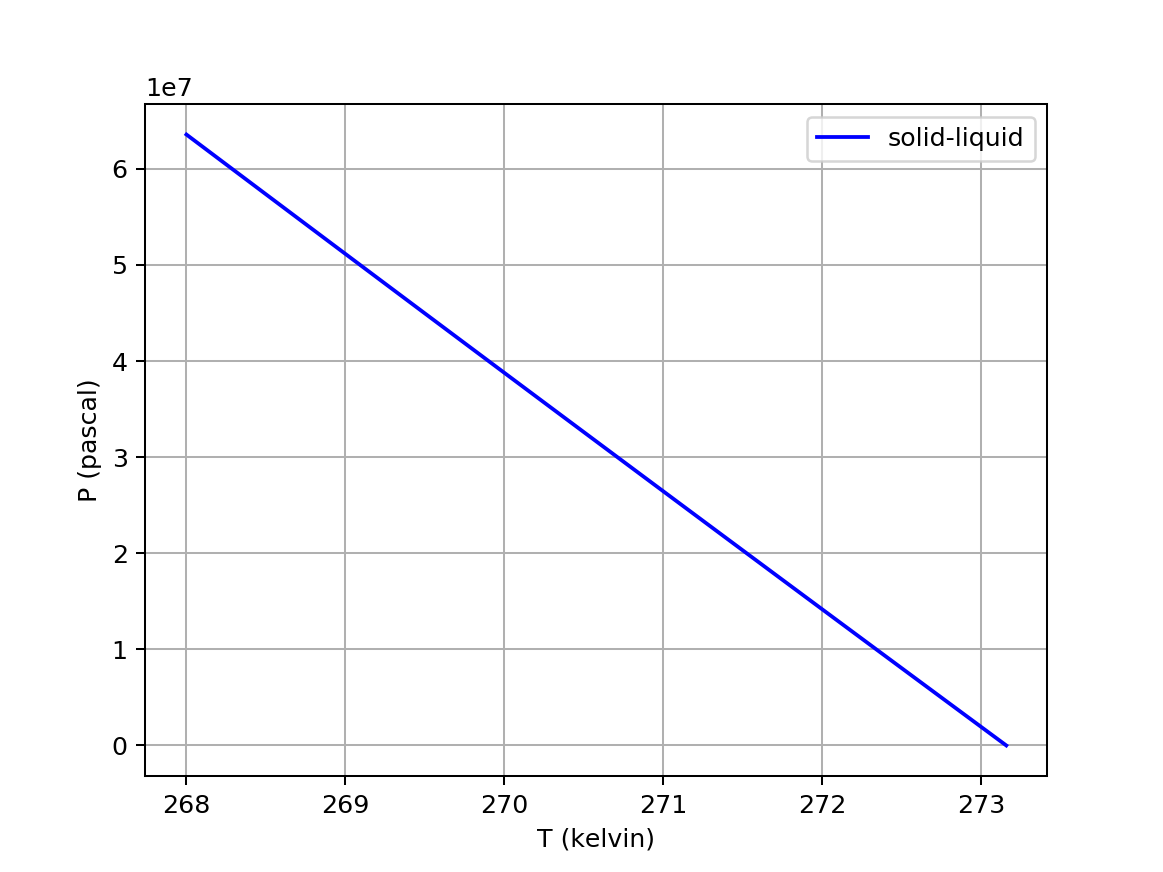

In [16]:
# Specify the temperature we want to integrate to, in units K
T = AssignQuantity(268,'K')

# Specify the enthalpy of fusion (we'll just assume the standard value at 298 K, 6 kJ/mol)
### BEGIN SOLUTION
DHfus = AssignQuantity(6,'kJ/mol')
### END SOLUTION

# Specify the volume of liquid water, 1 cm^3/g
V_liq_pergram = AssignQuantity(1,'cm^3/g') # 1 gram water has a volume of 1 cm^3

# Convert V_liq_pergram to cm^3/mol by multiplying by the molar mass of water; call the result V_liq
### BEGIN SOLUTION
V_liq = V_liq_pergram*M; print('Molar volume of liquid:', V_liq)
### END SOLUTION

# Convert V_liq to SI (m^3/mol)
### BEGIN SOLUTION
V_liq.ito('m^3/mol'); print('Molar volume of liquid in SI units:', V_liq)
### END SOLUTION

# Estimate the volume of ice as 10% more than that of liquid
V_sol = V_liq*1.1; print('Molar volume of solid in SI units:', V_sol)

# Get the change in volume liq-sol; call the result DVfus
### BEGIN SOLUTION
DVfus = V_liq-V_sol; print('Molar volume difference:', DVfus)
### END SOLUTION

# Call Thompson
T_sl, P_sl = Thomson(T,T3,P3,DHfus,DVfus,R,AssignQuantity)

# Plot the solid->liquid phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.grid(True)
plt.xlabel('T ('+str(T_sl.units)+')')
plt.ylabel('P ('+str(P_sl.units)+')')
plt.legend()

### Define the Clausius-Clapeyron function

In [19]:
def Clausius_Clapeyron(T,T3,P3,DH,R,AssignQuantity):
    
### BEGIN SOLUTION
#     T_array = AssignQuantity(np.linspace(T3,T),T.units)
    T_array = np.linspace(T3,T)
    R.ito('J/mol/K')
    DH.ito('J/mol')
    P_array = P3*np.exp(-DH/R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)
### END SOLUTION

    return T_array, P_array

### Liquid -> vapor phase boundary using Clausius-Clapeyron

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


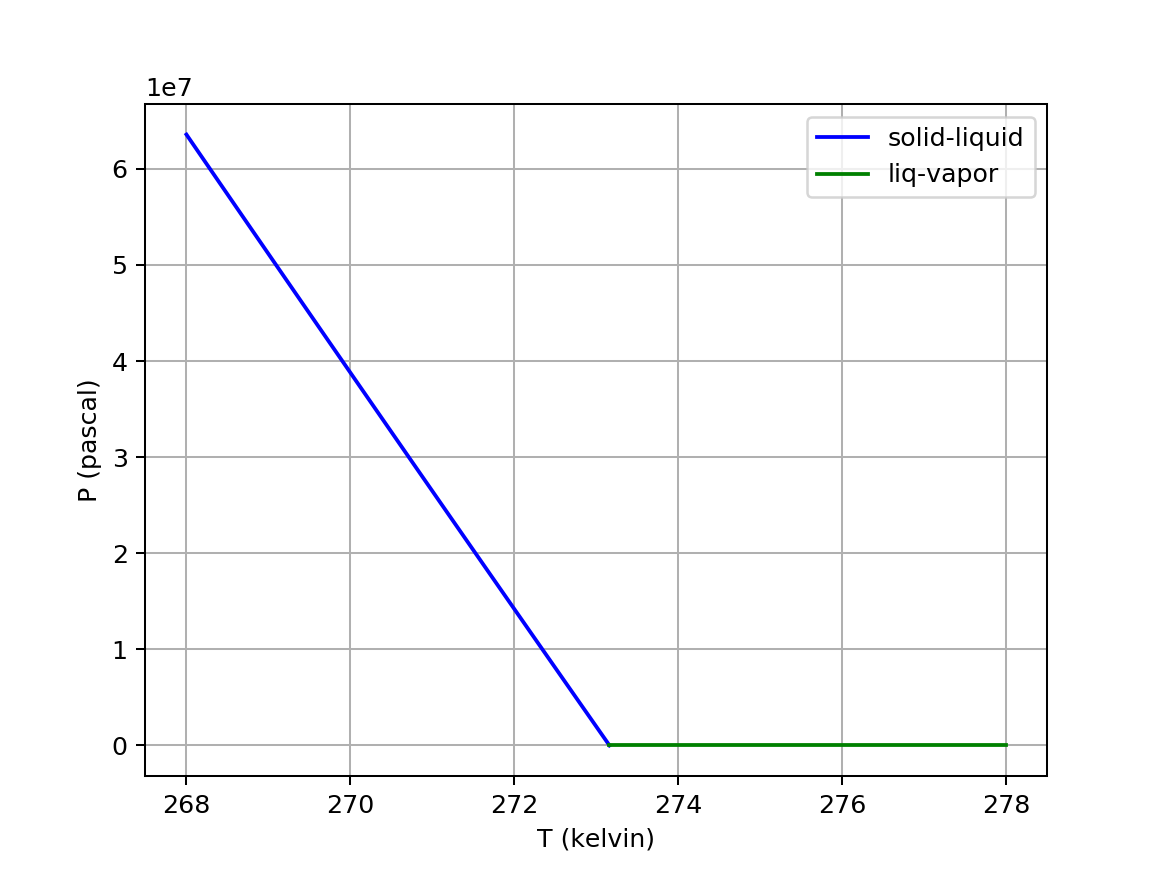

In [20]:
# Specify the temperature we want to integrate to
T = AssignQuantity(278,'K')

# Get the enthalpy of vaporization (liq->vapor) (we'll just assume the standard value at 298 K)
DHvap = AssignQuantity(44,'kJ/mol')

# Call Clausius_Clapeyron
T_lv, P_lv = Clausius_Clapeyron(T,T3,P3,DHvap,R,AssignQuantity)

# Plot the liquid->vapor phase boundary along with the solid->liquid one
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_lv.units)+')')
plt.ylabel('P ('+str(P_lv.units)+')')
plt.legend()

### Solid -> vapor phase boundary using Clausius-Clapeyron

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


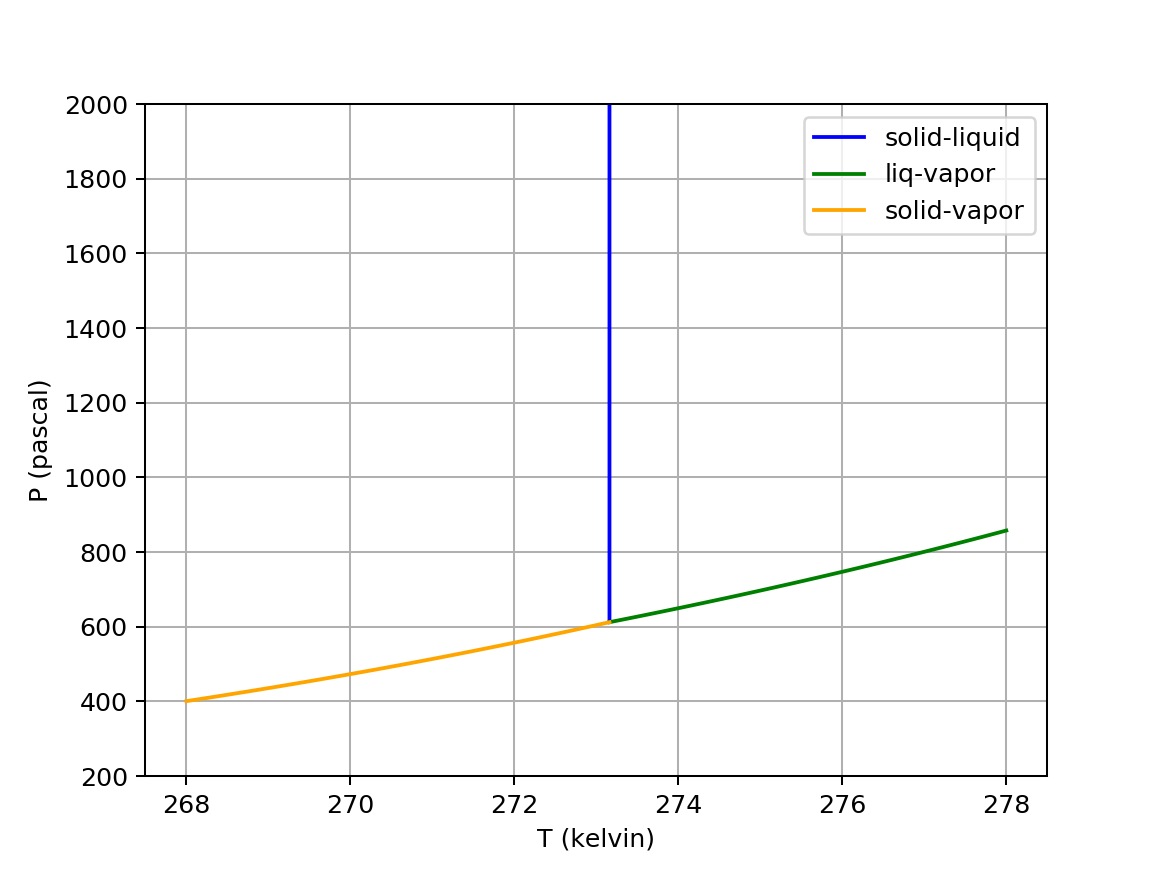

(200, 2000)

In [21]:
### BEGIN SOLUTION

# Specify the temperature we want to integrate to
T = AssignQuantity(268,'K')

# Get the enthalpy of sublimation (we'll just assume the standard value at 298 K)
DHsub = AssignQuantity(50,'kJ/mol')

# Call Clausius_Clapeyron
T_sv, P_sv = Clausius_Clapeyron(T,T3,P3,DHsub,R,AssignQuantity)

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

# This rescales the vertical axis so we can see more of the liquid->vapor and solid->vapor curves
plt.ylim(200,2000)

### Re-plotting on a semilog (in pressure) scale
Copy the plotting commands in your previous cell, but replace every instance of "plt.plot" with "plt.semilogy".

<IPython.core.display.Javascript object>


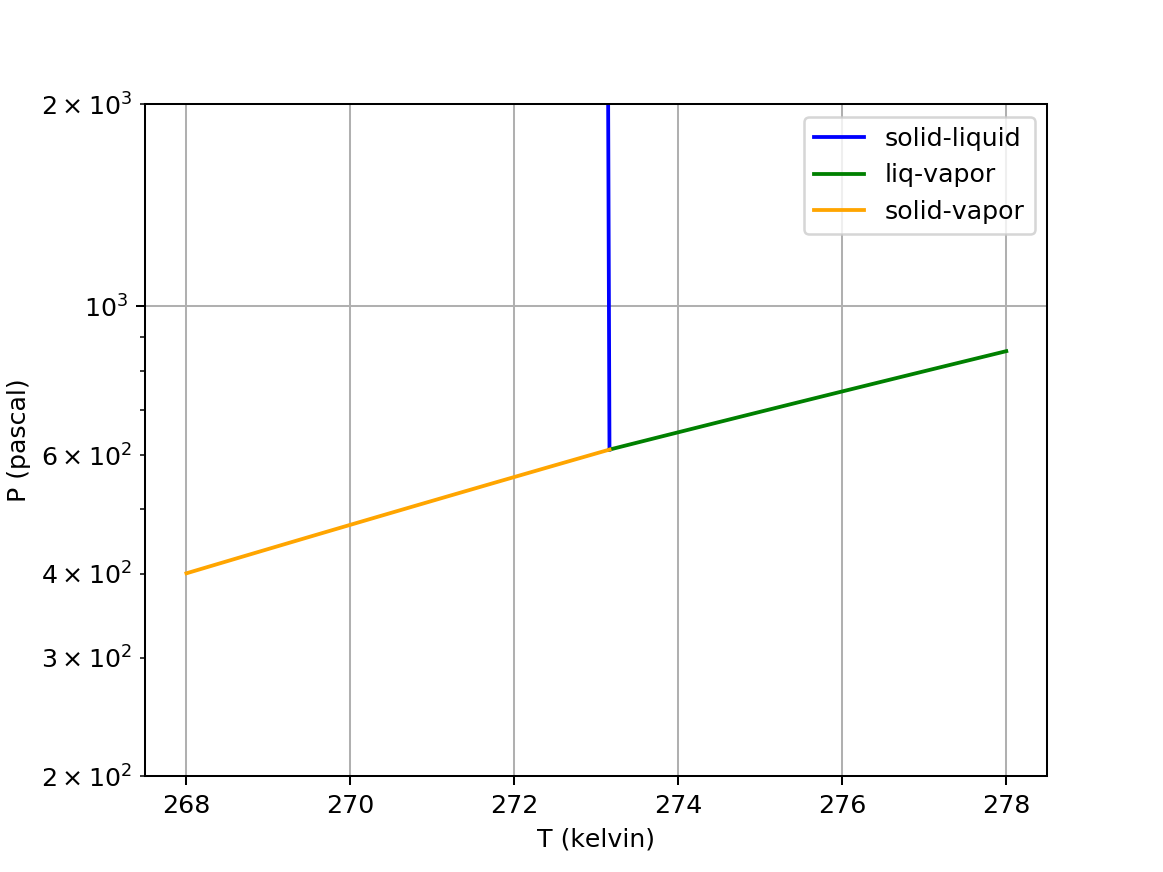

(200, 2000)

In [22]:
### BEGIN SOLUTION

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.semilogy(T_sl,P_sl,color='blue',label='solid-liquid')
plt.semilogy(T_lv,P_lv,color='green',label='liq-vapor')
plt.semilogy(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

# This rescales the vertical axis so we can see more of the liquid->vapor and solid->vapor curves
plt.ylim(200,2000)